# Task: Our task is predict the categorization of a persons credit score based on a selection of attributes

In [82]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings

 predict the categorization of a persons credit score based on a selection of attr# Task: Our task isibutes

In [83]:
test_url = "https://raw.githubusercontent.com/Harshk10-star/Credit-Score-Classification/466ff436e9a5623cb0b4c778c3fbf5da84d0ae76/train.csv"
test_info = pd.read_csv(test_url, sep=',')
train_url = ""

C:\Users\DvirM\AppData\Local\Temp\ipykernel_32336\2037590750.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  test_info = pd.read_csv(test_url, sep=',')


# 1 - Exploratory Data Analysis (EDA)

In [84]:
test_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [85]:
test_info.shape

(100000, 28)

In [86]:
test_info.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [87]:
test_info.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [88]:
test_info.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

- Roughly 15% of entries do not contain a value for `Monthly_Inhand_Salary` 
- There are some columns who's data types are objects when they should be numerical like `Outstanding_Debt` for example

# Cleaning the data/pipeline

In [89]:
test_info.drop_duplicates(inplace=True) # removes duplicate rows
test_info.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [90]:
warnings.filterwarnings('ignore', message="A value is trying to be set on a copy of a DataFrame or Series.*")

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Type_of_Loan', 'Name']

test_info.drop(columns=columns_to_drop, inplace=True)
num_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
           'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
           'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

cat_features = ['Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix', 'Occupation']

# Define functions for data cleaning
def cleanColumnUnderscore(df, colName):
    df[colName] = df[colName].str.replace('_', '')
    return df

def cleanAge(df):
    copy = df.copy()
    copy['Age'] = pd.to_numeric(copy['Age'], errors='coerce')
    filtered_ages = copy[(copy['Age'] >= 0) & (copy['Age'] <= 100)]['Age']
    mean_age = int(filtered_ages.mean())
    copy.loc[copy['Age'] < 0, 'Age'] = mean_age
    copy.loc[copy['Age'] > 100, 'Age'] = mean_age
    return copy
    
def convert_to_numeric(df, col_name):
    copy = df.copy()
    copy[col_name] = pd.to_numeric(copy[col_name], errors='coerce')
    return copy

def clean_monthly_inhand(df):
    copy = df.copy()
    missing_indices = copy[copy['Monthly_Inhand_Salary'].isnull()].index
    for index in missing_indices:
        annual_income = copy.loc[index, 'Annual_Income']
        similar_salaries = copy[(copy['Annual_Income'] >= annual_income - 10000) & 
                            (copy['Annual_Income'] <= annual_income + 10000) & 
                            copy['Monthly_Inhand_Salary'].notnull()]
        if not similar_salaries.empty:
            estimated_salary = similar_salaries['Monthly_Inhand_Salary'].median()
            copy.loc[index, 'Monthly_Inhand_Salary'] = estimated_salary
    
    return copy 

def fill_with_mean(df, col_name):
    copy = df.copy()
    copy[col_name] = pd.to_numeric(copy[col_name], errors='coerce')
    copy[col_name].fillna(copy[col_name].mean(), inplace=True)
    return copy

 
def clean_num_of_loan(df):
    copy = df.copy()
    copy['Num_of_Loan'] = copy['Num_of_Loan'].astype(str) # converts vals in column to string
    copy['Num_of_Loan'] = copy['Num_of_Loan'].str.replace('_', '') # removes underscores from string
    copy['Num_of_Loan'] = pd.to_numeric(copy['Num_of_Loan'], errors='coerce') # converts string to int value
    copy.loc[copy['Num_of_Loan'] < 0, 'Num_of_Loan'] = 0 #changes any negative values to 0

    return copy

def clean_inquires(df):
    copy = df.copy()
    sum_values = copy['Num_Credit_Card'] + copy['Num_of_Loan']
    copy['Num_Credit_Inquiries'].fillna(sum_values, inplace=True)

    return copy

def clean_credit_history_age(df):
    copy = df.copy()
    copy['Credit_History_Age'] = copy['Credit_History_Age'].str.extract(r'(\d+) Years')
    copy['Credit_History_Age'] = pd.to_numeric(copy['Credit_History_Age'], errors='coerce')
    copy['Credit_History_Age'].fillna(0, inplace=True)
    return copy

def clean_amount_invested_monthly(df):
    copy = df.copy()

    copy['Amount_invested_monthly'] = pd.to_numeric(copy['Amount_invested_monthly'], errors='coerce')

    # Filter out NaN values in 'Amount_invested_monthly'
    not_null_investments = copy.dropna(subset=['Amount_invested_monthly'])

    # Iterate through missing indices and fill with median of similar salaries
    missing_indices = copy[copy['Amount_invested_monthly'].isnull()].index
    for index in missing_indices:
        annual_income = copy.loc[index, 'Annual_Income']
        similar_salaries = not_null_investments[(not_null_investments['Annual_Income'] >= annual_income - 10000) & 
                                                (not_null_investments['Annual_Income'] <= annual_income + 10000)]
        if not similar_salaries.empty:
            estimated_salary = similar_salaries['Amount_invested_monthly'].median()
            copy.loc[index, 'Amount_invested_monthly'] = estimated_salary
    copy['Amount_invested_monthly'].fillna(0, inplace=True)
    
    return copy
    
def drop_subset_col(df, col):
    copy = df.copy()
    copy.dropna(subset=[col], inplace=True)
    return copy

def monthly_balance(df):
    copy = df.copy()

    copy['Monthly_Balance'] = pd.to_numeric(copy['Monthly_Balance'], errors='coerce')

    # Filter out NaN values in 'Amount_invested_monthly'
    not_null_investments = copy.dropna(subset=['Monthly_Balance'])

    # Iterate through missing indices and fill with median of similar salaries
    missing_indices = copy[copy['Monthly_Balance'].isnull()].index
    for index in missing_indices:
        annual_income = copy.loc[index, 'Annual_Income']
        similar_salaries = not_null_investments[(not_null_investments['Annual_Income'] >= annual_income - 10000) & 
                                                (not_null_investments['Annual_Income'] <= annual_income + 10000)]
        if not similar_salaries.empty:
            estimated_salary = similar_salaries['Monthly_Balance'].median()
            copy.loc[index, 'Monthly_Balance'] = estimated_salary
    
    return copy

def clean_num_of_delayed_payments(df):
    copy = df.copy()

    copy['Num_of_Delayed_Payment'] = copy['Num_of_Delayed_Payment'].str.replace('_', '') 
    copy['Num_of_Delayed_Payment'] = copy['Num_of_Delayed_Payment'].replace(r'.*-', '0', regex=True)
    copy['Num_of_Delayed_Payment'] = pd.to_numeric(copy['Num_of_Delayed_Payment'], errors='coerce')
    
    return copy
    
num_transformer = Pipeline(steps=[
    ('leaner', FunctionTransformer(lambda x: cleanColumnUnderscore(x, 'Age'))),
    ('ceaner', FunctionTransformer(lambda x: cleanColumnUnderscore(x, 'Annual_Income'))),
    #('clener', FunctionTransformer(lambda x: cleanColumnUnderscore(x, 'Occupation'))),
    ('clean age', FunctionTransformer(lambda x: cleanAge(x))),
    ('Anual_income to numeric', FunctionTransformer(lambda x: convert_to_numeric(x,'Annual_Income'))),
    ('clean amount invested monthly', FunctionTransformer(lambda x: clean_amount_invested_monthly(x))),
    ('clean monthly inhand', FunctionTransformer(lambda x: clean_monthly_inhand(x))),
    ('clean num_of_loan', FunctionTransformer(lambda x: clean_num_of_loan(x))),
    ('clean inquries', FunctionTransformer(lambda x: clean_inquires(x))),
    ('clean credit hisotry age', FunctionTransformer(lambda x: clean_credit_history_age(x))),
    ('clean delayed payments', FunctionTransformer(lambda x: clean_num_of_delayed_payments(x))),
    ('fill delayed payments', FunctionTransformer(lambda x: fill_with_mean(x, 'Num_of_Delayed_Payment'))),
    ('clean monthly balance', FunctionTransformer(lambda x: monthly_balance(x))),
    ('convert changed credit limit', FunctionTransformer(lambda x: convert_to_numeric(x,'Changed_Credit_Limit'))),
    ('convert outstanding debt', FunctionTransformer(lambda x: convert_to_numeric(x,'Outstanding_Debt'))),
    ('fill inhand salary', FunctionTransformer(lambda x: fill_with_mean(x, 'Monthly_Inhand_Salary'))),
    ('fill credit limit', FunctionTransformer(lambda x: fill_with_mean(x, 'Changed_Credit_Limit'))),
    ('fill outstanding debt', FunctionTransformer(lambda x: fill_with_mean(x, 'Outstanding_Debt'))),
    ('fill monthly balance', FunctionTransformer(lambda x: fill_with_mean(x, 'Monthly_Balance')))
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])
    

clean_data = preprocessor.fit_transform(test_info)
clean_data_df = pd.DataFrame(clean_data)
clean_data_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
dtype: int64

In [92]:
transformed_df = pd.DataFrame(clean_data, columns=num_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_features)))

# Get columns with null values
cols_with_null = transformed_df.columns[transformed_df.isnull().any()]

# Print the names of columns with null values
for col in cols_with_null:
    print(col)


<Axes: ylabel='count'>

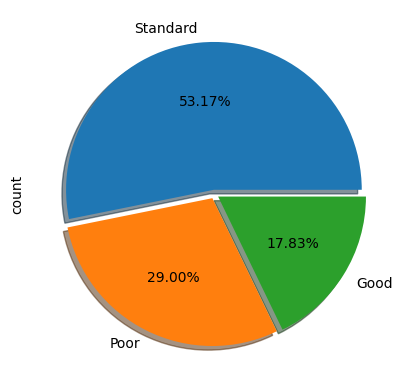

In [93]:
test_info["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],
)

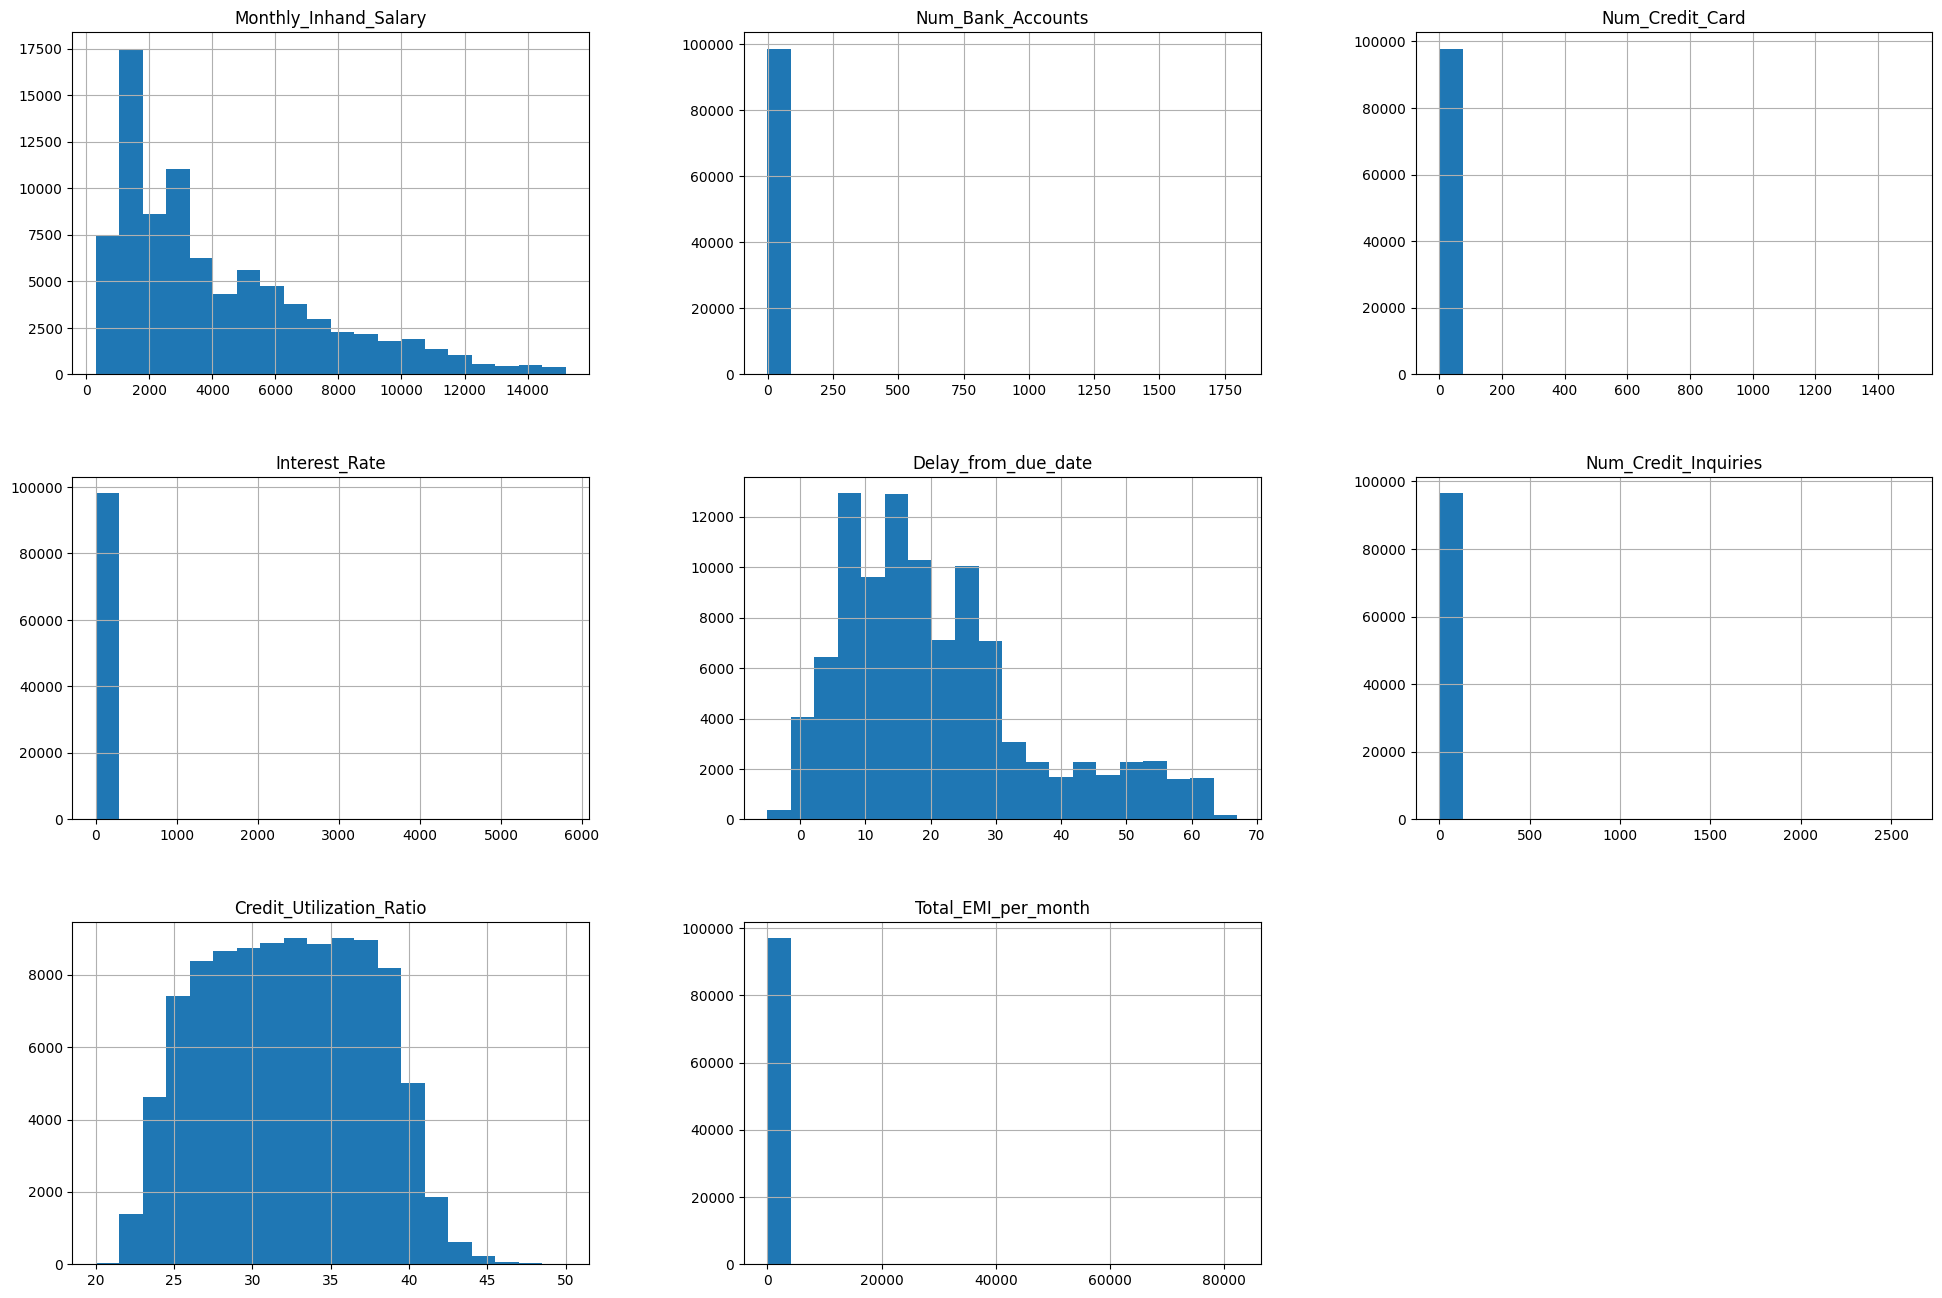

In [94]:
#change scaling on some of these graphs.
# test_info.hist(figsize=(24, 16))
# plt.show()
test_info.hist(bins=20, figsize=(24, 16))
plt.show()

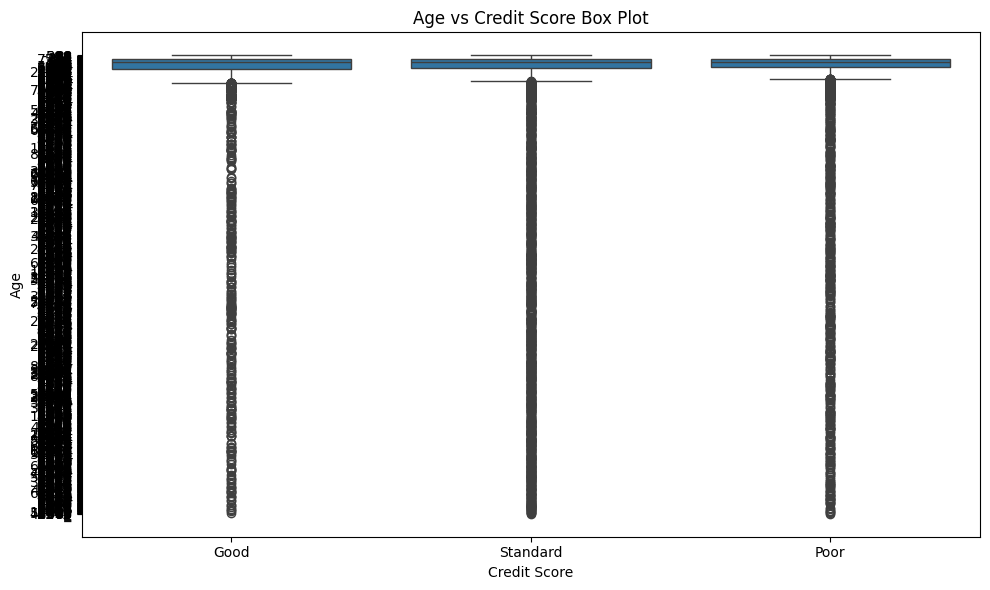

In [95]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='Credit_Score', y='Age', data=test_info)

# Add labels and title
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.title('Age vs Credit Score Box Plot')

# Show the plot
plt.tight_layout()
plt.show()

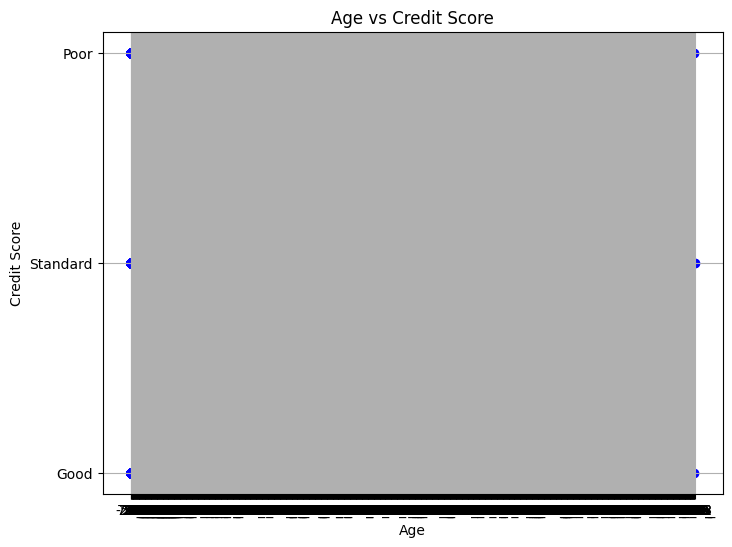

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(test_info['Age'], test_info['Credit_Score'], color='blue')
plt.title('Age vs Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

In [104]:
x = test_info.drop(['Credit_Score'], axis=1)
y = test_info['Credit_Score']
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])


gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier(random_state=42))])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.metrics import accuracy_score, classification_report

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score, classification_report

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("\nGradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Random Forest Accuracy: 0.78
Random Forest Classification Report:
              precision    recall  f1-score   support

        Good       0.72      0.71      0.72      3527
        Poor       0.78      0.78      0.78      5874
    Standard       0.80      0.80      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.77     20000
weighted avg       0.78      0.78      0.78     20000


Gradient Boosting Accuracy: 0.7032
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        Good       0.59      0.62      0.61      3527
        Poor       0.73      0.65      0.69      5874
    Standard       0.73      0.76      0.74     10599

    accuracy                           0.70     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5346
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Good       0.35      0.04      0.07      3527
        Poor       0.52      0.28      0.36      5874
    Standard       0.54      0.84      0.66     10599

    accuracy                           0.53     20000
   macro avg       0.47      0.39      0.36     20000
weighted avg       0.50      0.53      0.47     20000



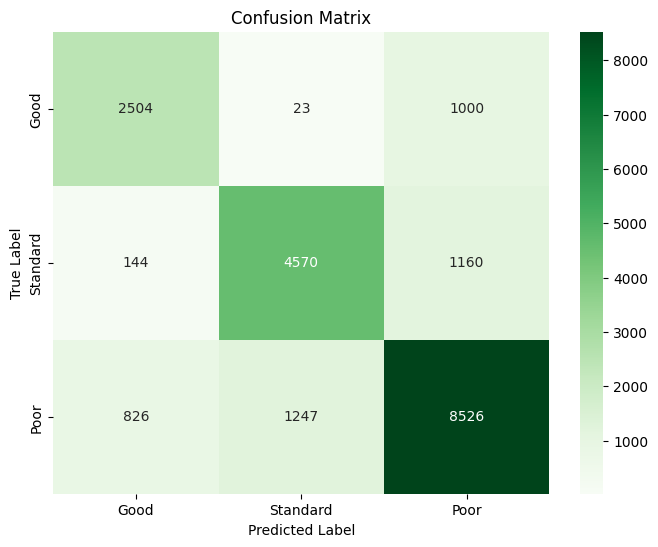

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Good', 'Standard', 'Poor']
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.show()

ValueError: multiclass format is not supported